## This notebook plots and analyzes historical price data for ethanol, sugar, and jet fuel

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Visualize the Historical Market Data

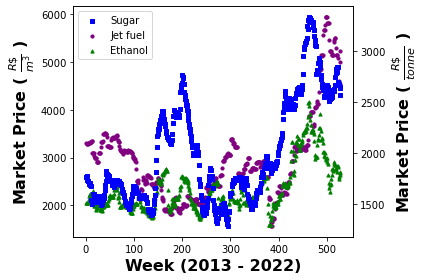

In [6]:
#Read in historical price data
df_prices = pd.read_excel('Mutran_jet_datav2.xlsx', sheet_name= 'Inflation')
x = np.arange(1,len(df_prices['p_je'])+ 1)

#Create Scatter plots for historical market prices
fig, ax1 = plt.subplots()

# color = 'tab:red'
ax1.set_xlabel('Week (2013 - 2022)', fontsize = 16, fontweight='bold')
ax1.set_ylabel(r'Market Price ( $\frac{R\$}{m^{3}}$ )', fontsize = 16, fontweight = 'bold')
ax1.scatter(280,1998,10, color = 'blue', marker = 's', label = 'Sugar')
ax1.scatter(x,df_prices['p_je'],10, label = 'Jet fuel', color = 'purple')
ax1.scatter(x,df_prices['p_et'],10, label = 'Ethanol', color = 'green', marker = '^')
# ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second Axes that shares the same x-axis

# color = 'tab:blue'
ax2.set_ylabel(r'Market Price ( $\frac{R\$}{tonne}$ )', fontsize = 16, fontweight = 'bold')  # we already handled the x-label with ax1
ax2.scatter(x,df_prices['p_su'],10, label = 'Sugar', color = 'blue', marker = 's')
# ax2.tick_params(axis='y', labelcolor=color)

ax1.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('manuscript_historicalprices.png',bbox_inches='tight', dpi=500)
plt.show()

### Compute Covariance and Correlation Matricies

In [3]:
##Calculate Covariance and Correlation matricies
covar = df_prices.cov()
print('Covariance Matrix')
print('-------------------')
print(covar)

correlation = df_prices.corr()
print('Correlation Matrix')
print('--------------------')
print(correlation)

Covariance Matrix
-------------------
               p_je           p_et           p_su           p_fr
p_je  814419.562681  218007.231444  167000.619411  -20547.072086
p_et  218007.231444  248825.822373  209619.645558  -50105.051808
p_su  167000.619411  209619.645558  260576.463901  -75093.485019
p_fr  -20547.072086  -50105.051808  -75093.485019  110383.385643
Correlation Matrix
--------------------
          p_je      p_et      p_su      p_fr
p_je  1.000000  0.484283  0.362515 -0.068529
p_et  0.484283  1.000000  0.823221 -0.302330
p_su  0.362515  0.823221  1.000000 -0.442775
p_fr -0.068529 -0.302330 -0.442775  1.000000


C:\Users\Maddie\AppData\Local\Temp\ipykernel_15880\3947392139.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covar = df_prices.cov()
C:\Users\Maddie\AppData\Local\Temp\ipykernel_15880\3947392139.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_prices.corr()


### Compute Average, Mode, and Median Prices

In [4]:
#Calculate Mean prices
mean_eth = df_prices['p_et'].mean()
mean_jet = df_prices['p_je'].mean()
mean_sug = df_prices['p_su'].mean()

#Calculate Mode of prices
mode_eth = df_prices['p_et'].mode()
mode_jet = df_prices['p_je'].mode()
mode_sug = df_prices['p_su'].mode()

#Calculate Median of prices
med_eth = df_prices['p_et'].median()
med_jet = df_prices['p_je'].median()
med_sug = df_prices['p_su'].median()

print('Average Prices')
print('--------------------')
print('Average ethanol price', np.round(mean_eth,2), ' $R/m3')
print('Average jet fuel price', np.round(mean_jet,2),' $R/m3')
print('Average sugar price', np.round(mean_sug,2),' $R/tonne')

print('Mode of Prices')
print('--------------------')
print('Mode of ethanol prices', np.round(mode_eth[0],2),' $R/m3')
print('Mode of jet fuel prices', np.round(mode_jet[0],2),' $R/m3')
print('Mode of sugar prices', np.round(mode_sug[0],2),' $R/tonne')

print('Median of Prices')
print('--------------------')
print('Median of ethanol prices', np.round(med_eth,2),' $R/m3')
print('Median of jet fuel prices', np.round(med_jet,2),' $R/m3')
print('Median of sugar prices', np.round(med_sug,2),' $R/tonne')

Average Prices
--------------------
Average ethanol price 2341.52  $R/m3
Average jet fuel price 2939.02  $R/m3
Average sugar price 1998.66  $R/tonne
Mode of Prices
--------------------
Mode of ethanol prices 2073.93  $R/m3
Mode of jet fuel prices 3217.52  $R/m3
Mode of sugar prices 1751.51  $R/tonne
Median of Prices
--------------------
Median of ethanol prices 2176.31  $R/m3
Median of jet fuel prices 2827.1  $R/m3
Median of sugar prices 1775.54  $R/tonne
